In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Background Data

In [13]:
npz_data = np.load("../data/background.npz")
print(npz_data.files)

['data']


In [14]:
npz_data['data'].shape

(100000, 2, 200)

In [15]:
first_segment_back_0 = npz_data['data'][0][0]
time = np.array(range(200))

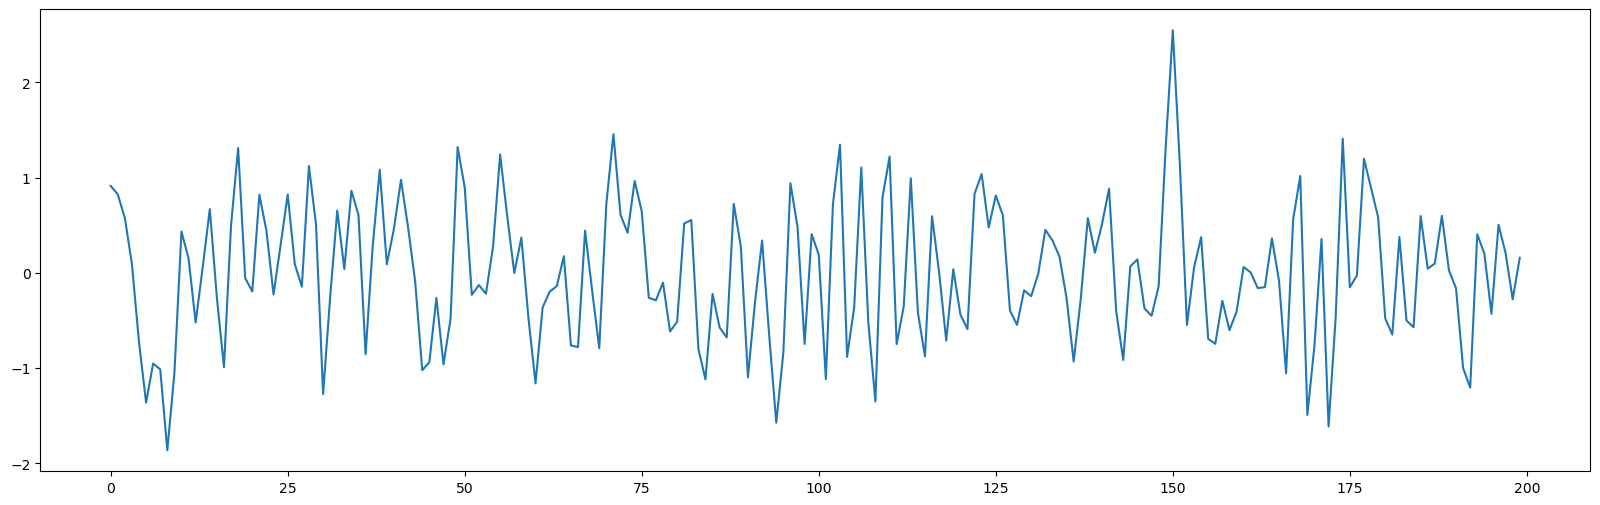

In [16]:
plt.figure(figsize=(20,6))
plt.plot(time, first_segment_back_0)

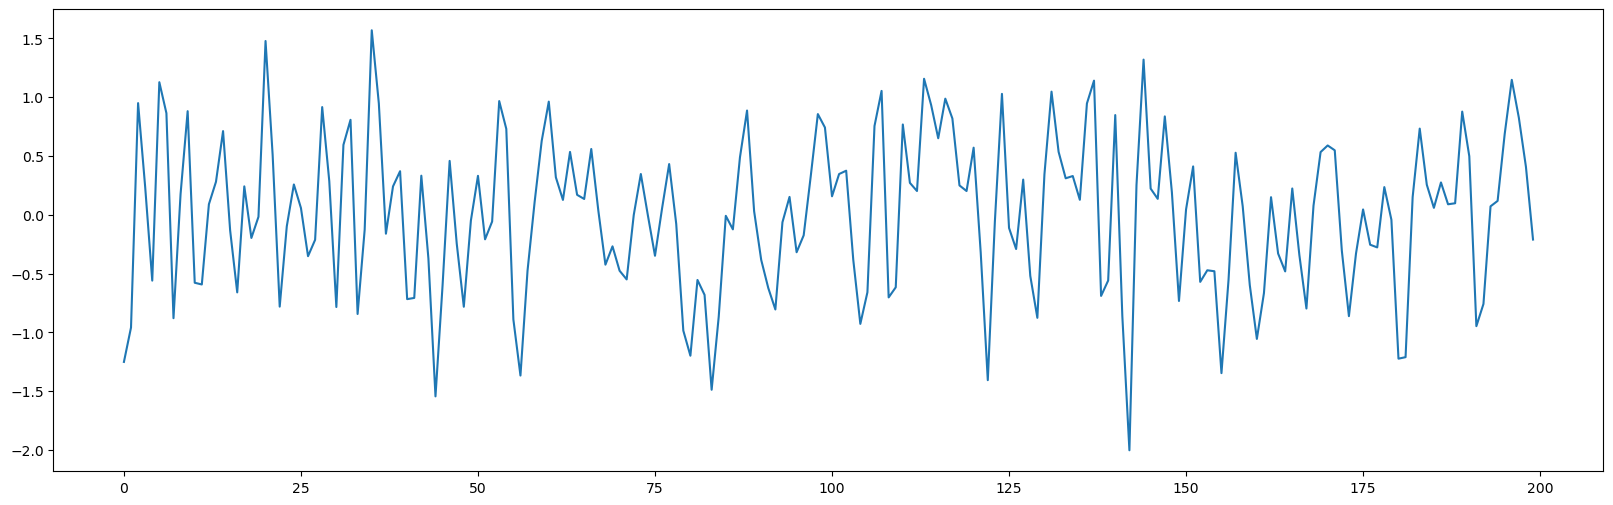

In [17]:
first_segment_back_1 = npz_data['data'][0][1]
plt.figure(figsize=(20,6))
plt.plot(time, first_segment_back_1)

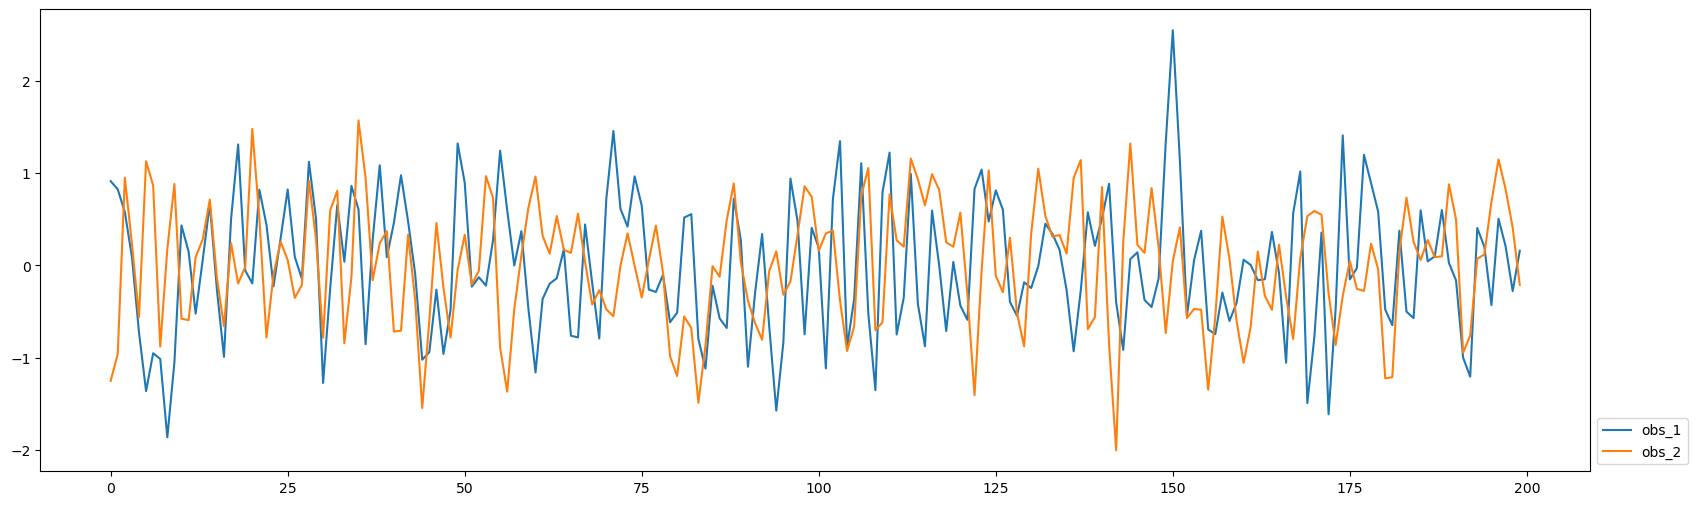

In [18]:
plt.figure(figsize=(20,6))

plt.plot(time, first_segment_back_0, label="obs_1")
plt.plot(time, first_segment_back_1, label="obs_2")
plt.legend(loc=3,bbox_to_anchor=(1,0))

This wave is way to erratic to be understood. We will try to smooth out the noise and irregularities to create a better visual representation

In [19]:
bin_size = 5 # ideally should be a number divisible for 200
num_bins = 200 // bin_size
time_bin = np.array(range(num_bins))

first_segment_back_0_bin = (first_segment_back_0.reshape(num_bins, bin_size)).mean(axis=1)
first_segment_back_0_bin

first_segment_back_1_bin = (first_segment_back_1.reshape(num_bins, bin_size)).mean(axis=1)
first_segment_back_1_bin

array([-0.31639085,  0.43426089, -0.01743068, -0.15281655,  0.27402926,
        0.13923571, -0.07023214,  0.59373736, -0.60129655, -0.24345119,
        0.35281351, -0.39893318,  0.42256964,  0.00746509, -0.13706118,
       -0.18482716, -0.95754086,  0.25482753, -0.34440798,  0.28749536,
       -0.08588971, -0.03371804,  0.66657957,  0.5820554 , -0.03694502,
       -0.2996471 ,  0.51360366,  0.1933699 , -0.08853876,  0.13087016,
       -0.21291371, -0.37904058, -0.47624657, -0.06051008, -0.07158525,
       -0.05837729, -0.25891463,  0.28006451, -0.20328284,  0.57152511])

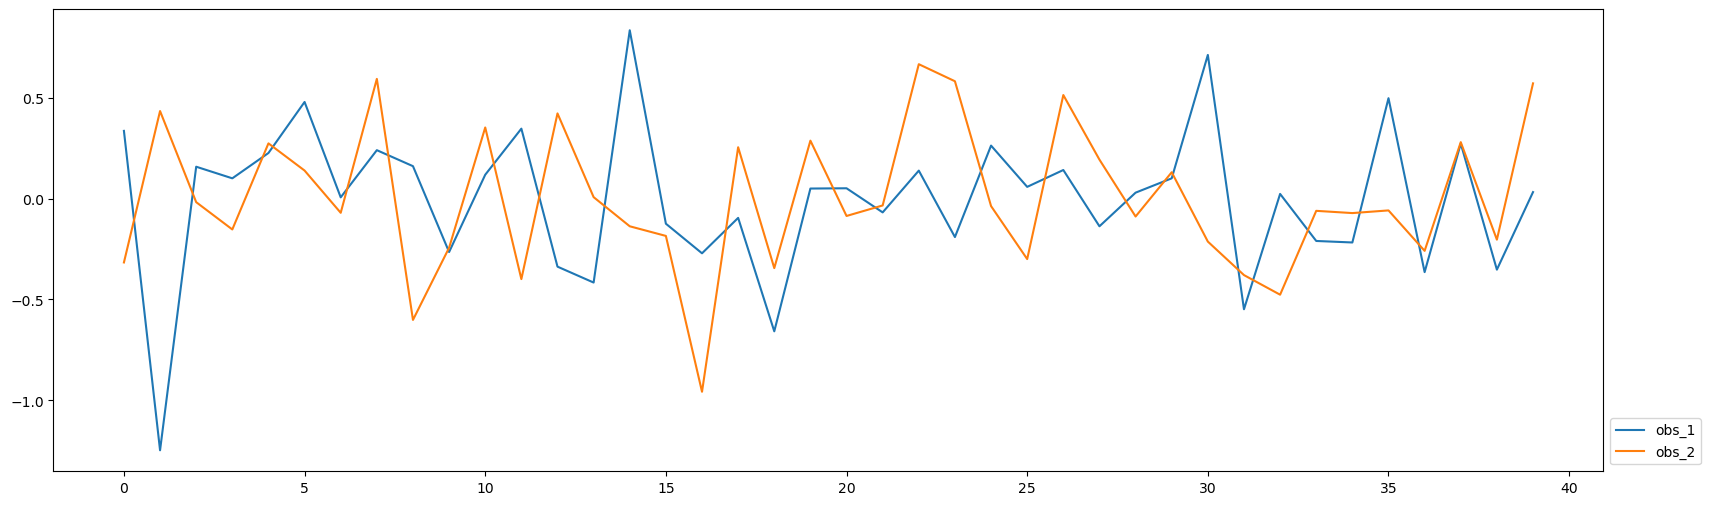

In [20]:
plt.figure(figsize=(20,6))

plt.plot(time_bin, first_segment_back_0_bin, label="obs_1")
plt.plot(time_bin, first_segment_back_1_bin, label="obs_2")
plt.legend(loc=3,bbox_to_anchor=(1,0))

In [21]:
# 2 represents the 2 data streams coming from LIGO interferometers
# 200 represents the number of samples
# 1000000 represents the number of segments 
# in total, this data spans ~1.389 hours 
npz_data['data'][0].shape

(2, 200)

In [25]:
multi_seg_back_0 = np.array([])
for i in range(100):
    multi_seg_back_0 = np.concatenate((multi_seg_back_0, npz_data['data'][i][0]), axis=0)
multi_seg_back_0.shape

multi_seg_back_1 = np.array([])
for i in range(100):
    multi_seg_back_1 = np.concatenate((multi_seg_back_1, npz_data['data'][i][1]), axis=0)
multi_seg_back_1.shape

(20000,)

In [23]:
mfccs = librosa.feature.mfcc(y=multi_seg_back_0, sr=4096, n_mfcc=20)

plt.figure(figsize=(20,6))
librosa.display.specshow(mfccs, x_axis='time', sr=4096, cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()

NameError: name 'librosa' is not defined

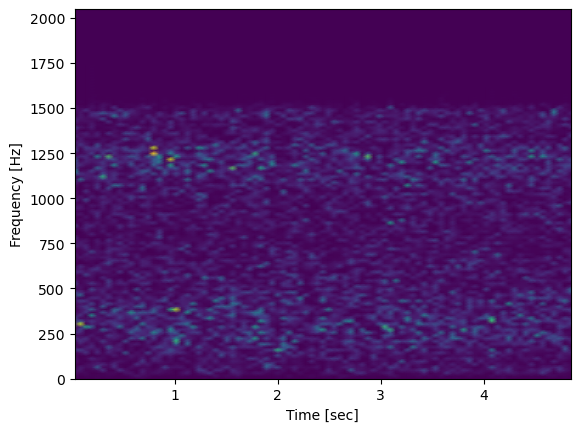

In [27]:
f, t, Sxx = signal.spectrogram(multi_seg_back_0, fs=4096)
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]');

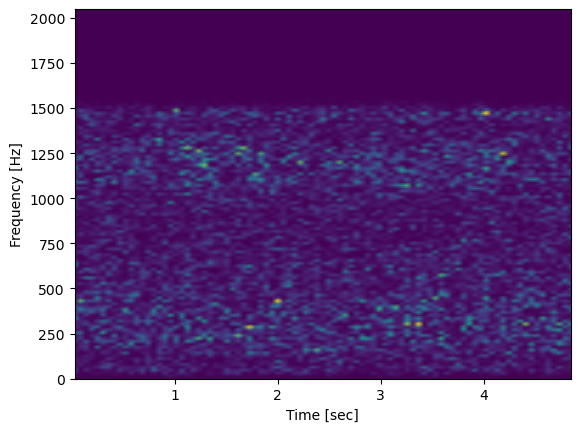

In [26]:
f, t, Sxx = signal.spectrogram(multi_seg_back_1, fs=4096)
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]');

# Binary Black hole data

In [30]:
bbh_data = np.load("../data/bbh_for_challenge.npy")

In [12]:
first_segment_bbh_0 = bbh_data[0][0]
first_segment_bbh_1 = bbh_data[0][1]

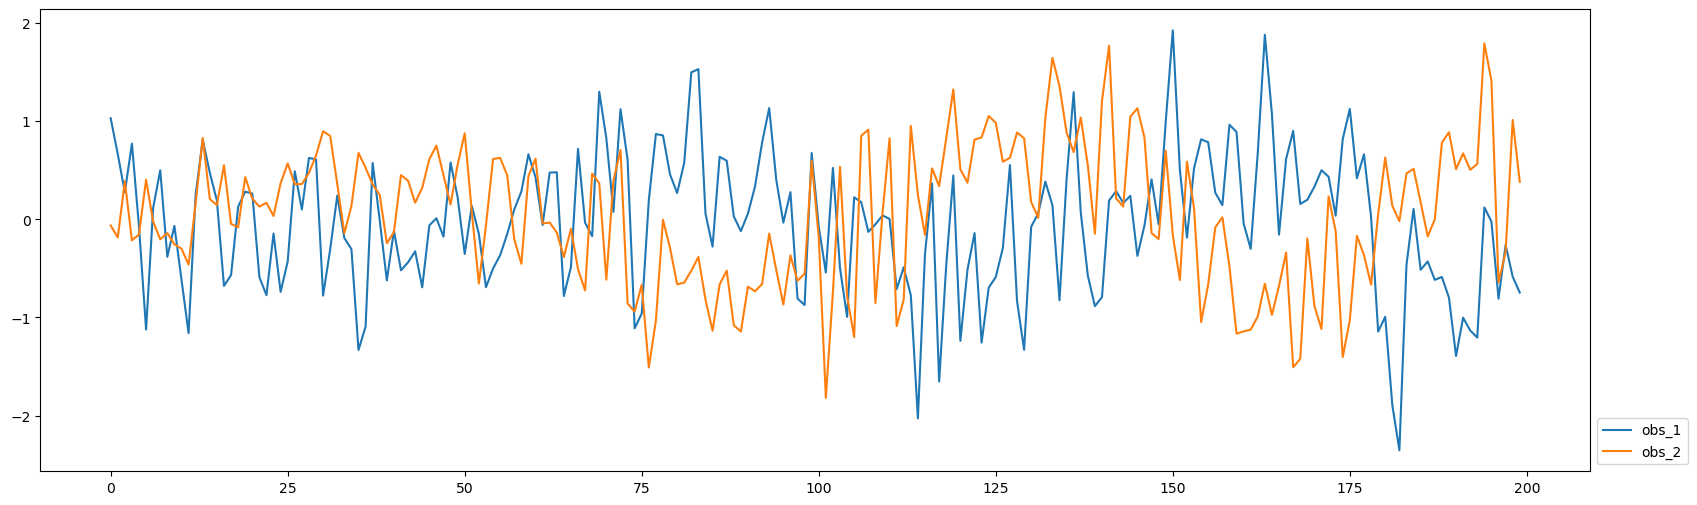

In [13]:
plt.figure(figsize=(20,6))

plt.plot(time, first_segment_bbh_0, label="obs_1")
plt.plot(time, first_segment_bbh_1, label="obs_2")
plt.legend(loc=3,bbox_to_anchor=(1,0))

Instead of having constant noise that averages out around 0, the black hole waves seem to exhibit the behavior of a sine wave with tons of noise. 

In [14]:
bin_size = 5 # ideally should be a number divisible for 200
num_bins = 200 // bin_size
time_bin = np.array(range(num_bins))

first_segment_bbh_0_bin = (first_segment_bbh_0.reshape(num_bins, bin_size)).mean(axis=1)
first_segment_bbh_0_bin

first_segment_bbh_1_bin = (first_segment_bbh_1.reshape(num_bins, bin_size)).mean(axis=1)
first_segment_bbh_1_bin

array([-0.0454993 , -0.04404427,  0.08806011,  0.19928388,  0.18231699,
        0.48221819,  0.4206377 ,  0.31272529,  0.24083135,  0.50369254,
        0.17008176,  0.17198677,  0.00446725, -0.09957836, -0.26257486,
       -0.70112717, -0.60646561, -0.90931202, -0.54828736, -0.36399752,
       -0.59921357, -0.04572719,  0.02409443,  0.56994225,  0.71648659,
        0.78201674,  0.84566838,  0.60165634,  0.87310734,  0.46441067,
       -0.22572152, -0.47380946, -0.97730686, -0.82832165, -0.65876765,
       -0.43489788,  0.34629464,  0.3336278 ,  0.80905621,  0.36594392])

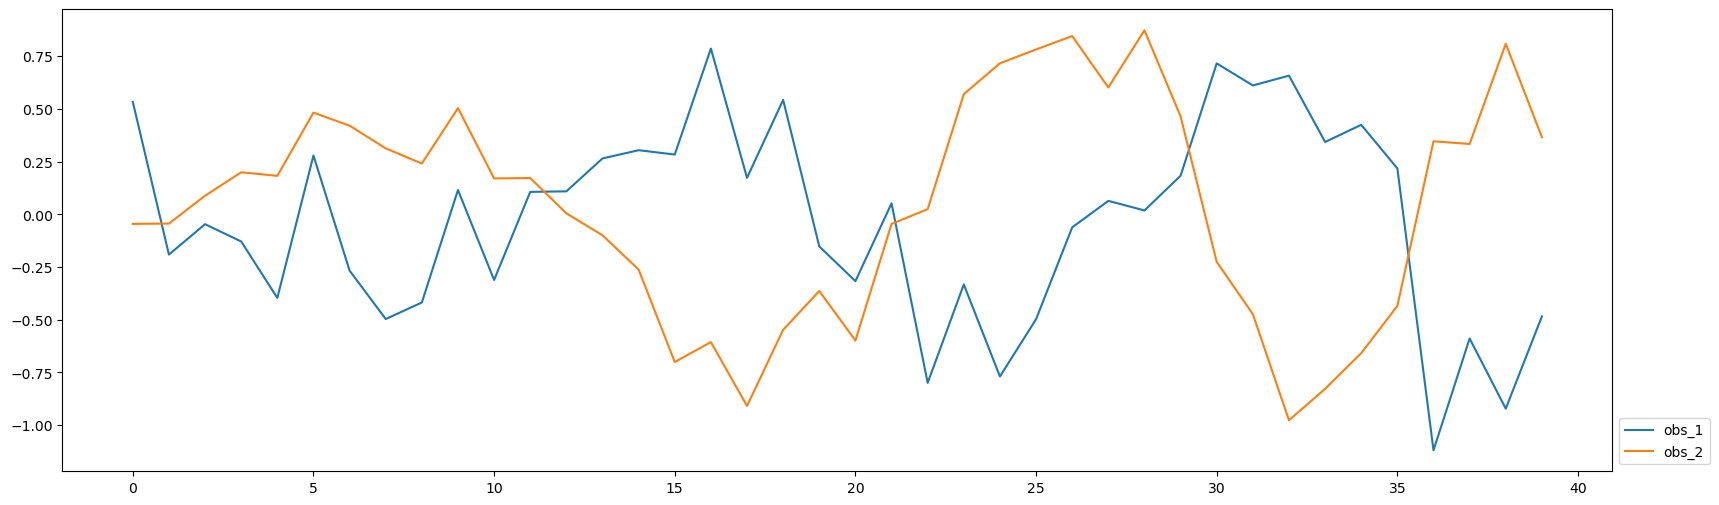

In [15]:
plt.figure(figsize=(20,6))

plt.plot(time_bin, first_segment_bbh_0_bin, label="obs_1")
plt.plot(time_bin, first_segment_bbh_1_bin, label="obs_2")
plt.legend(loc=3,bbox_to_anchor=(1,0))

When we smooth out the wave, we can see that whenever one observatory has a valley for a wave, the other experiences a peak. 

In [31]:
multi_seg_bbh_0 = np.array([])
for i in range(100):
    multi_seg_bbh_0 = np.concatenate((multi_seg_bbh_0, bbh_data[i][0]), axis=0)
multi_seg_bbh_0.shape

multi_seg_bbh_1 = np.array([])
for i in range(100):
    multi_seg_bbh_1 = np.concatenate((multi_seg_bbh_0, bbh_data[i][1]), axis=0)
multi_seg_bbh_1.shape

(20200,)

Now, since we are dealing with waves, we take the MFCC of the wave. These are commonly used as features in speech recognition systems, so it could pose useful here. Here we are using 20 coefficients to capture the complex waves present. However, it might not be appropriate because it is built for human speech

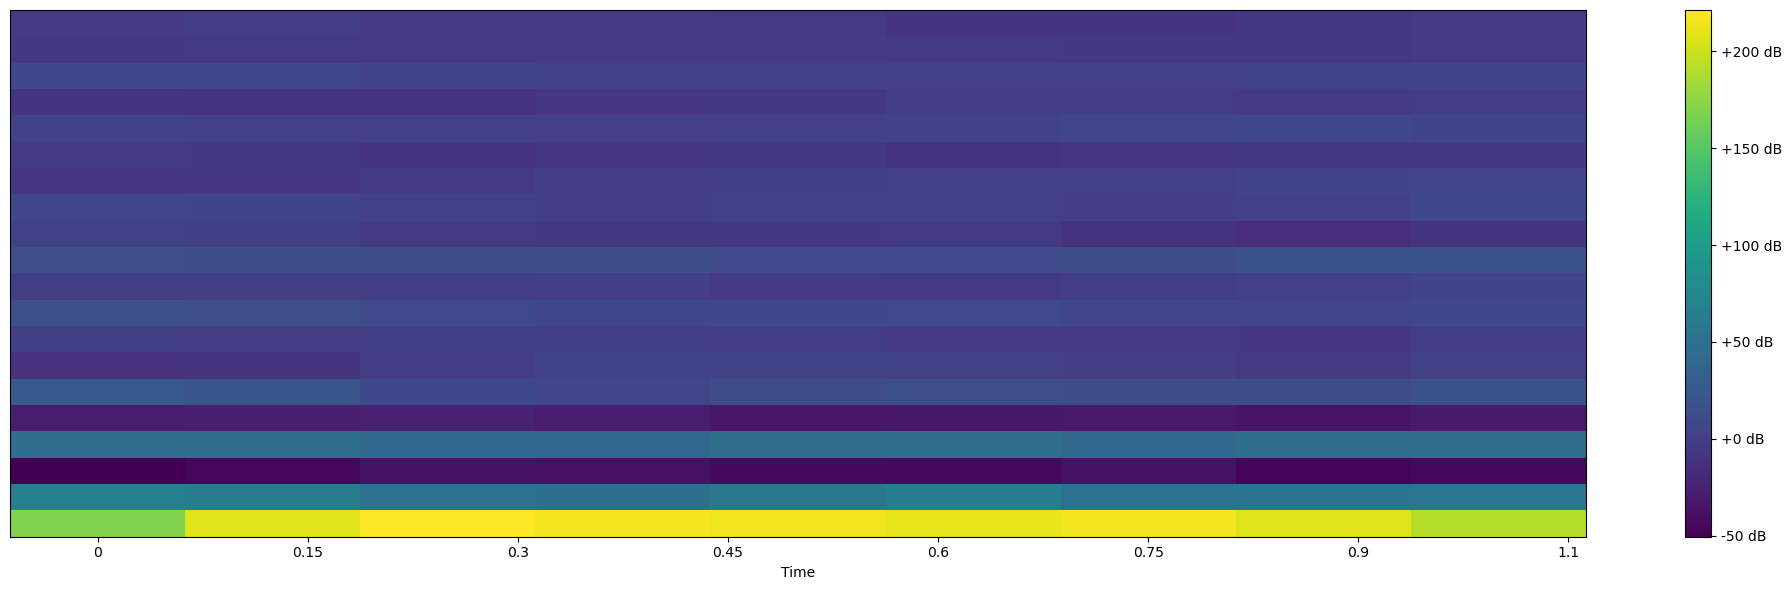

In [30]:
mfccs = librosa.feature.mfcc(y=multi_seg_bbh_0, sr=4096, n_mfcc=20)

plt.figure(figsize=(20,6))
librosa.display.specshow(mfccs, x_axis='time', sr=4096, cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()

A spectrogram represents the signal strength (loudness) of a signal over time. Time runs on the horizontal axis, frequencies run on the vertical axis, and amplitude is captured through color. Blue represent low amplitudes and red represents louder amplitudes. An LIGO sensor can detect frequncies from 10Hz to 10kHZ

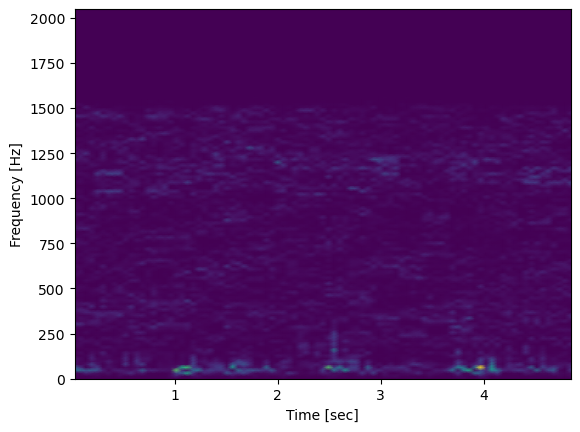

In [32]:
f, t, Sxx = signal.spectrogram(multi_seg_bbh_0, fs=4096)
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]');

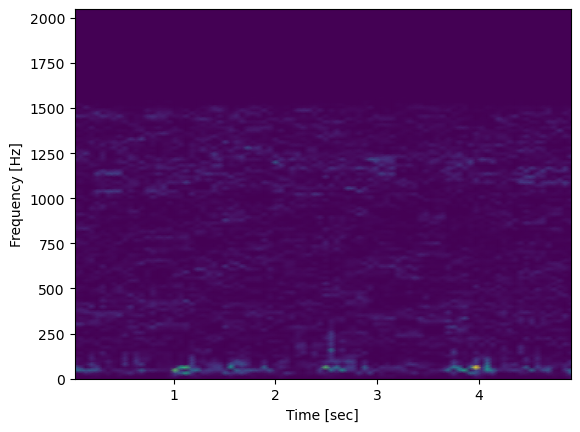

In [33]:
f, t, Sxx = signal.spectrogram(multi_seg_bbh_1, fs=4096)
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]');

# Sine Gaussian Low Frequency Data

In [34]:
sglf_data = np.load("../data/sglf_for_challenge.npy")

In [19]:
first_segment_sglf_0 = sglf_data[0][0]
first_segment_sglf_1 = sglf_data[0][1]

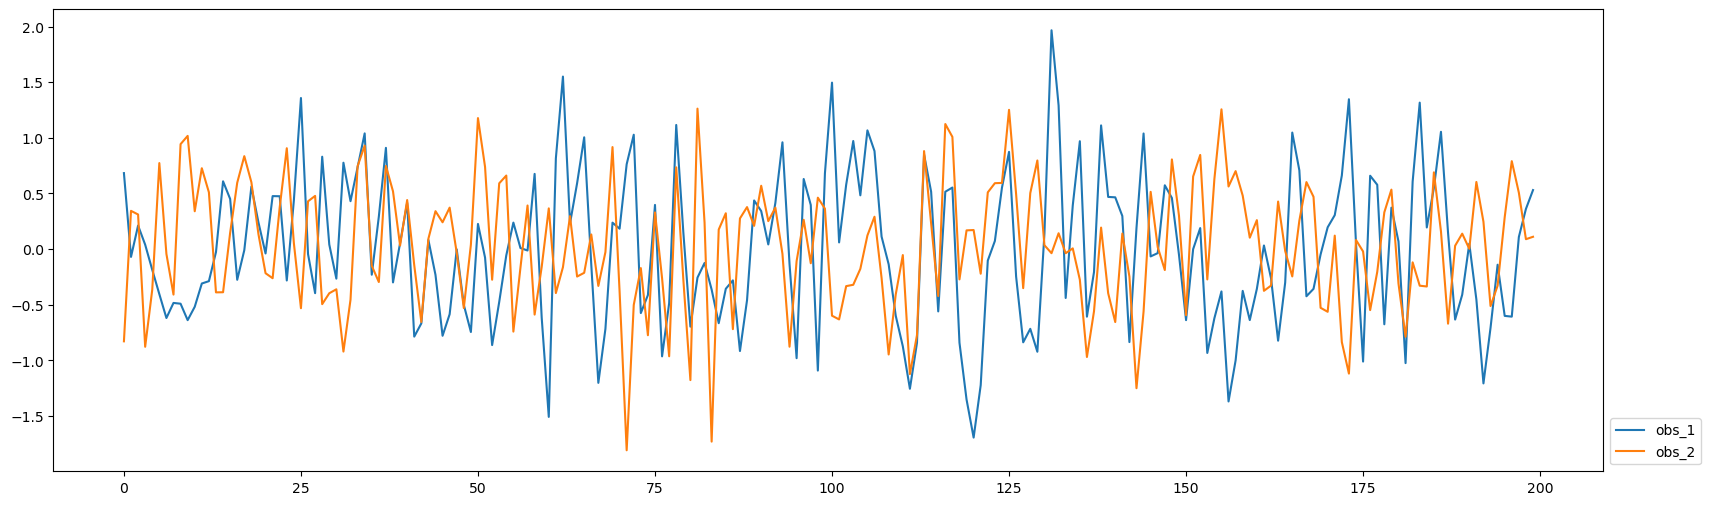

In [20]:
plt.figure(figsize=(20,6))

plt.plot(time, first_segment_sglf_0, label="obs_1")
plt.plot(time, first_segment_sglf_1, label="obs_2")
plt.legend(loc=3,bbox_to_anchor=(1,0))

This data ironically doesn't look like a sine wave. It looks similar to the background noise data

In [21]:
first_segment_sglf_0_bin = (first_segment_sglf_0.reshape(num_bins, bin_size)).mean(axis=1)
first_segment_sglf_0_bin

first_segment_sglf_1_bin = (first_segment_sglf_1.reshape(num_bins, bin_size)).mean(axis=1)
first_segment_sglf_1_bin

array([-0.28383171,  0.45595618,  0.1597029 ,  0.46210223,  0.17104038,
       -0.10354323, -0.01285402,  0.17007384,  0.01469894,  0.01784168,
        0.57839288, -0.25341296, -0.02899544,  0.09507586, -0.72783025,
       -0.08678998, -0.24667874,  0.09249333,  0.05425649,  0.17041488,
       -0.41291446, -0.24065405, -0.16798762,  0.32093138,  0.32903583,
        0.5383918 ,  0.0215059 , -0.40190743, -0.51534169,  0.28961913,
        0.25184098,  0.6202634 , -0.00691203,  0.11045148, -0.46354159,
        0.01768418, -0.37691777,  0.069002  ,  0.00174721,  0.35628886])

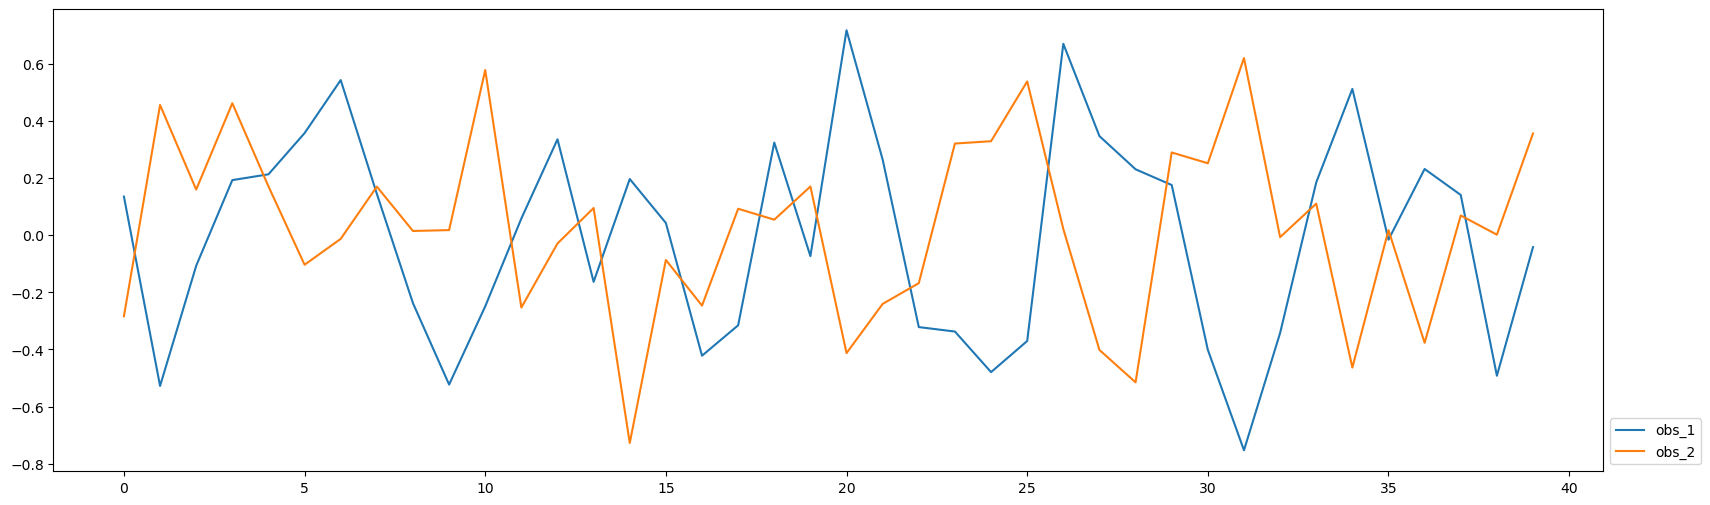

In [22]:
plt.figure(figsize=(20,6))

plt.plot(time_bin, first_segment_sglf_0_bin, label="obs_1")
plt.plot(time_bin, first_segment_sglf_1_bin, label="obs_2")
plt.legend(loc=3,bbox_to_anchor=(1,0))

In [36]:
multi_seg_sglf_0 = np.array([])
for i in range(100):
    multi_seg_sglf_0 = np.concatenate((multi_seg_sglf_0, sglf_data[i][0]), axis=0)
multi_seg_sglf_0.shape

multi_seg_sglf_1 = np.array([])
for i in range(100):
    multi_seg_sglf_1 = np.concatenate((multi_seg_sglf_1, sglf_data[i][1]), axis=0)
multi_seg_sglf_1.shape

(20000,)

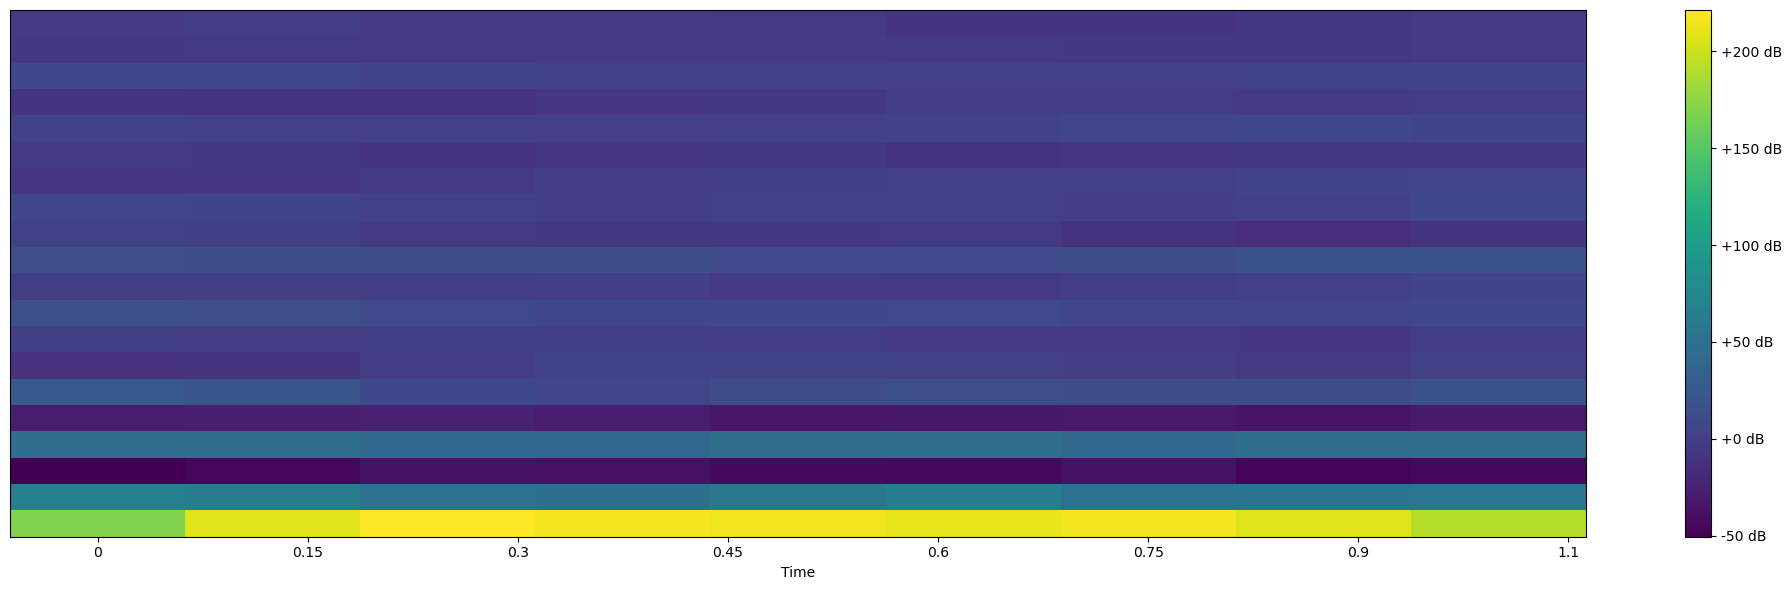

In [40]:
mfccs = librosa.feature.mfcc(y=multi_seg_bbh_0, sr=4096, n_mfcc=20)

plt.figure(figsize=(20,6))
librosa.display.specshow(mfccs, x_axis='time', sr=4096, cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()

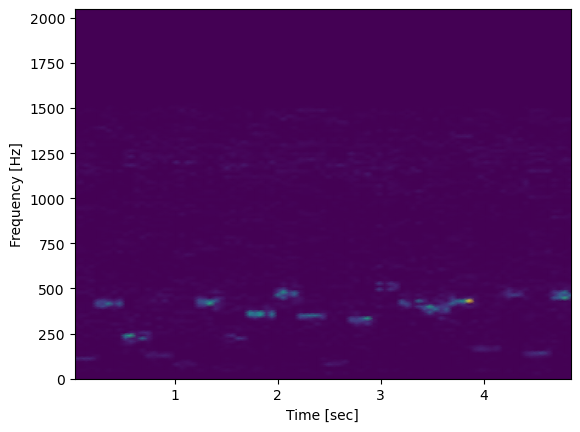

In [37]:
f, t, Sxx = signal.spectrogram(multi_seg_sglf_0, fs=4096)
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]');

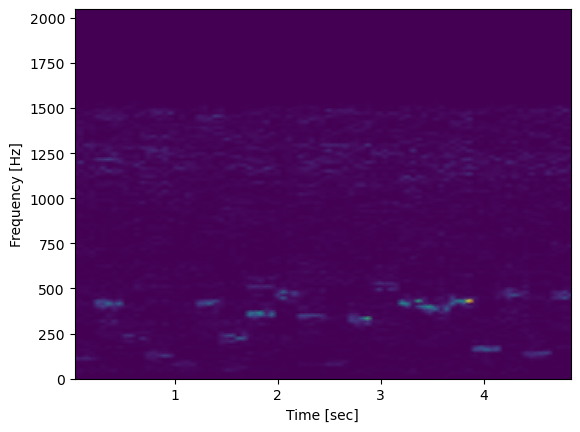

In [38]:
f, t, Sxx = signal.spectrogram(multi_seg_sglf_1, fs=4096)
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]');